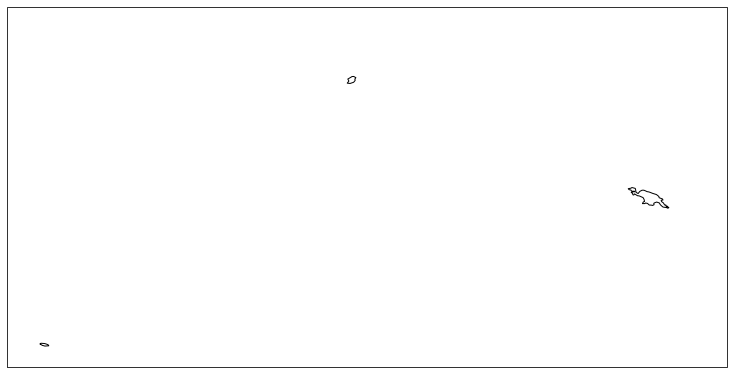

In [8]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add borders to the plot
shape_file = shpreader.natural_earth(resolution='110m',category='physical',name='coastline')

counter = 0
for shape in shpreader.Reader(shape_file).records():
    # if counter >= 3:
    #     break
    counter += 1
    ax.add_geometries([shape.geometry], ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none')

fig.subplots_adjust(left=0, bottom=0, right=1, top=1)


# Save the plot as an SVG file
plt.savefig('borders_3_TEMP.svg', format="svg", dpi=300, bbox_inches='tight')

# Load the SVG file as an ElementTree
tree = ET.parse('borders_3_TEMP.svg')
root = tree.getroot()

# Find the first "g" element and add the shapes as children
g = root.find('.//{http://www.w3.org/2000/svg}g')

counter = 0

for shape in shpreader.Reader(shape_file).records():
    if counter >= 3:
        break
    counter += 1
    path = ET.Element('path')
    path.set('d', shape.geometry.svg(scale_factor=1))
    # path.set('stroke', 'red')
    # path.set('fill', 'none')
    g.append(path)

# ax.set_frame_on(False)

# Write the updated SVG file to disk
tree.write('borders_3.svg')

print(tree)